In [116]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris #datasets

from sklearn.preprocessing import StandardScaler #전처리

from sklearn.model_selection import train_test_split #데이터 split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix # 성능평가 및 검증
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier# 알고리즘
from sklearn.tree import DecisionTreeClassifier




- sklearn.datasets
    - load_: 저장되어 불러온 데이터
    - fetch_: 크기 커서 웹에서 가져온 데이터
    - make_: 임의로 생성한 데이터
    
    
- import _Classifier_ : cat 분류기
- import _Regressor_: 수치 Regressor

In [2]:
type(load_iris) #function이다

function

In [4]:
data = load_iris()

In [5]:
type(data) # Bunch: dict을 확장해 attrib 방식으로 접근 가능해짐

sklearn.utils.Bunch

In [9]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [86]:
print(data.DESCR[:500])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

  


In [16]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
iris1 = pd.DataFrame(data.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris2 = pd.DataFrame(data.target)
iris2.rename({0:'target'},axis=1,inplace=True)

In [26]:
iris = pd.concat((iris1,iris2), axis=1)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
38,4.4,3.0,1.3,0.2,0
98,5.1,2.5,3.0,1.1,1
43,5.0,3.5,1.6,0.6,0
128,6.4,2.8,5.6,2.1,2
57,4.9,2.4,3.3,1.0,1


In [27]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [35]:
iris.target=iris.target.astype('category')

In [36]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
iris.describe(include='category')

,target
count,150
unique,3
top,2
freq,50


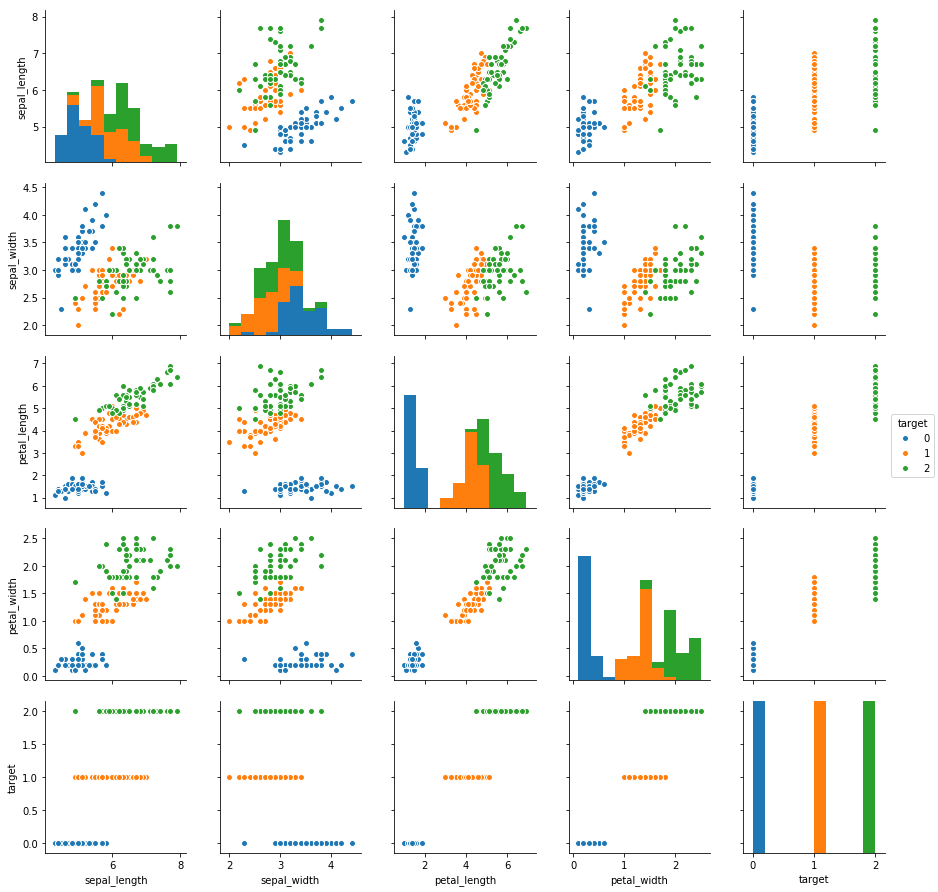

In [40]:
sns.pairplot(iris, hue = 'target')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001816E74F710>,
      dtype=object)

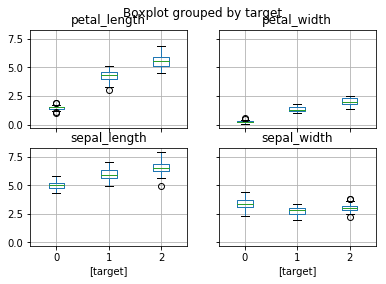

In [46]:
iris.boxplot(by='target')

#### Data Split
- HoldOut
    - 학습안된 부분 때문에 성능떨어지는 경우 존재 -> 평가끝난후 전체 데이터로 다시 학습하여 해결
    
- 

In [56]:
X = iris.drop(columns='target')
y = iris.target

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =180807 )

#### KNN

In [77]:
knn = KNeighborsClassifier()

In [78]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
confusion_matrix(y_test, knn.predict(X_test))

array([[13,  0,  0],
       [ 0, 17,  2],
       [ 0,  1, 12]], dtype=int64)

In [105]:
knn.score(X_test,y_test) #accuracy

0.9333333333333333

In [115]:
precision, recall, fscore, support = score(y_test, knn.predict(X_test))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         0.94444444 0.85714286]
recall: [1.         0.89473684 0.92307692]
fscore: [1.         0.91891892 0.88888889]
support: [13 19 13]


DummyClassifier를 이용한 accuracy와 비교

In [113]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [112]:
dummy.score(X_test,y_test)

0.3111111111111111

precision: [1.         0.94444444 0.85714286]
recall: [1.         0.89473684 0.92307692]
fscore: [1.         0.91891892 0.88888889]
support: [13 19 13]


#### DecisionTree

In [81]:
tree = DecisionTreeClassifier()

In [82]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
confusion_matrix(y_test, tree.predict(X_test))

array([[13,  0,  0],
       [ 0, 16,  3],
       [ 0,  1, 12]], dtype=int64)

In [106]:
tree.score(X_test,y_test) #accuracy

0.9111111111111111

In [99]:
precision, recall, fscore, support = score(y_test, tree.predict(X_test))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         0.94117647 0.8       ]
recall: [1.         0.84210526 0.92307692]
fscore: [1.         0.88888889 0.85714286]
support: [13 19 13]
